In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN


import plotly.express as px
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA,LatentDirichletAllocation

#### Perform required cleaning to bring the uniformity in the data.

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
for col in df.columns:
    print(df[col].value_counts())

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
22       4
24       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
0.000000       5903
4.000000         56
5.000000         53
7.000000         45
11.000000        42
               ... 
398.572712        1
390.870000        1
62.750000         1
1097.016667       1
398.066667        1
Name: Administrative_Duration, Length: 3335, dtype: int64
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
24       1
16       1
11       1
13       1
Name: Informational, dtype: int64
0.000000      9925
9.000000        33
6.000000        26
10.000000       26
7.000000        26
              ... 
264.750000       1
162.750000       1
78.500000        

#### Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.

#### UNI-VARIATE ANALYSIS.

In [47]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [28]:
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

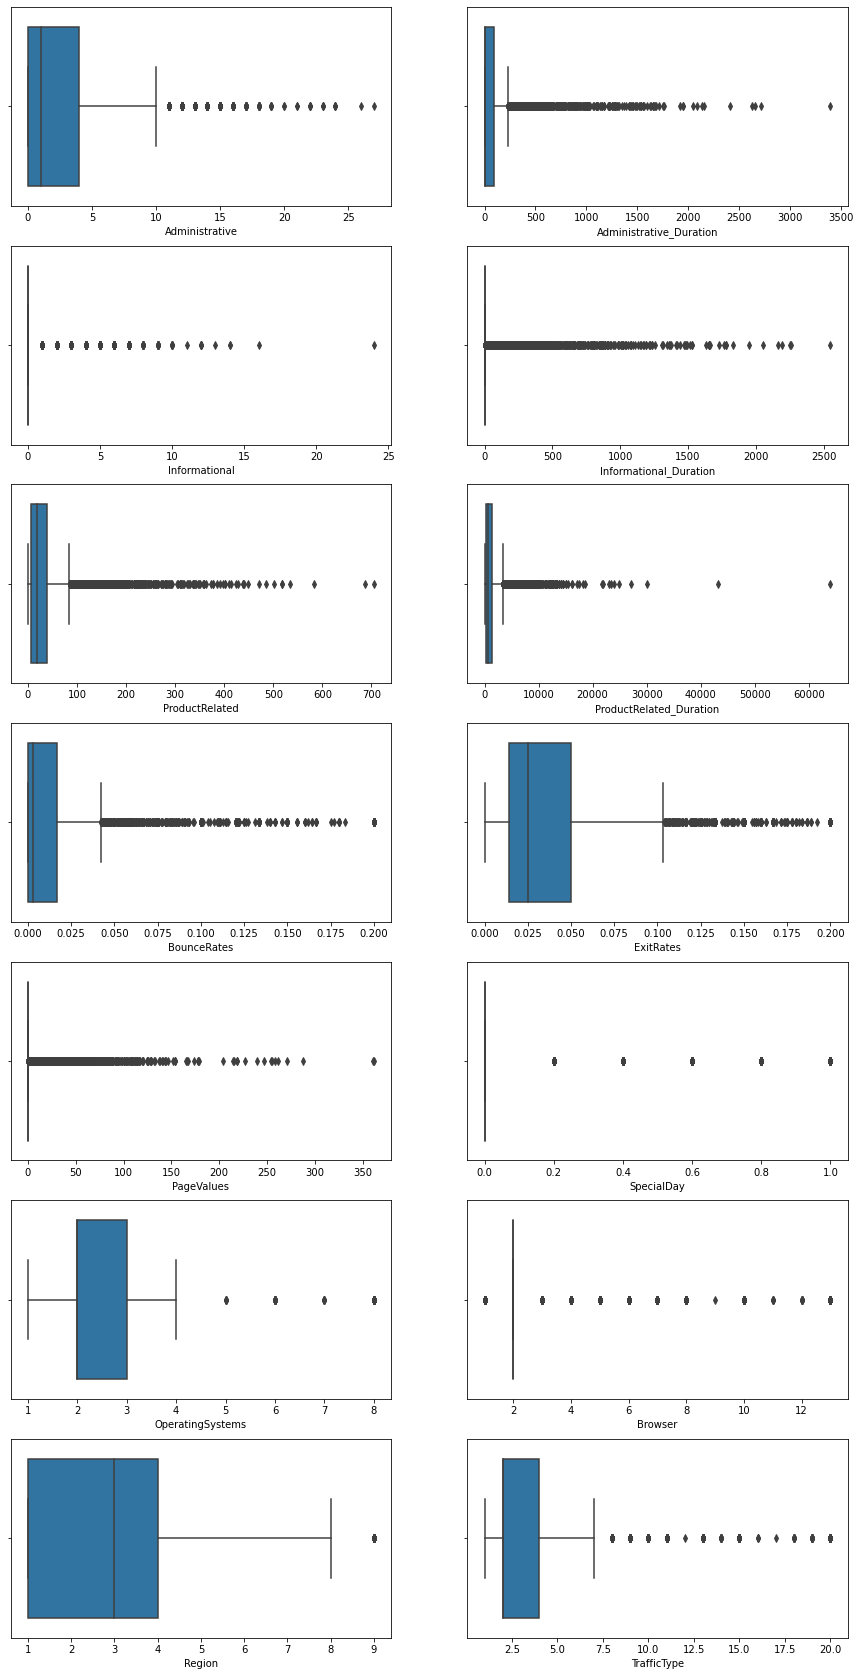

In [29]:
f,ax=plt.subplots(nrows=7,ncols=2,figsize=(15,30))

for variable,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
    
plt.show()

#### BI-VARIATE ANALYSIS.

In [49]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [50]:
# Here we can see that the Highest correlation that explains around 0.5 with respective to Target Variable.
# Since I guess there is very mild Linear Relationship exits for variable 'Page values' & also mynute Linear relationship exits.
# But for the rest of variables There is no where the correlation and Linear Relationship exits.
# And there is high chance of multicollinearity for variables other than 'Page Values.'

In [33]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#### MULTIVARIATE ANALYSIS.

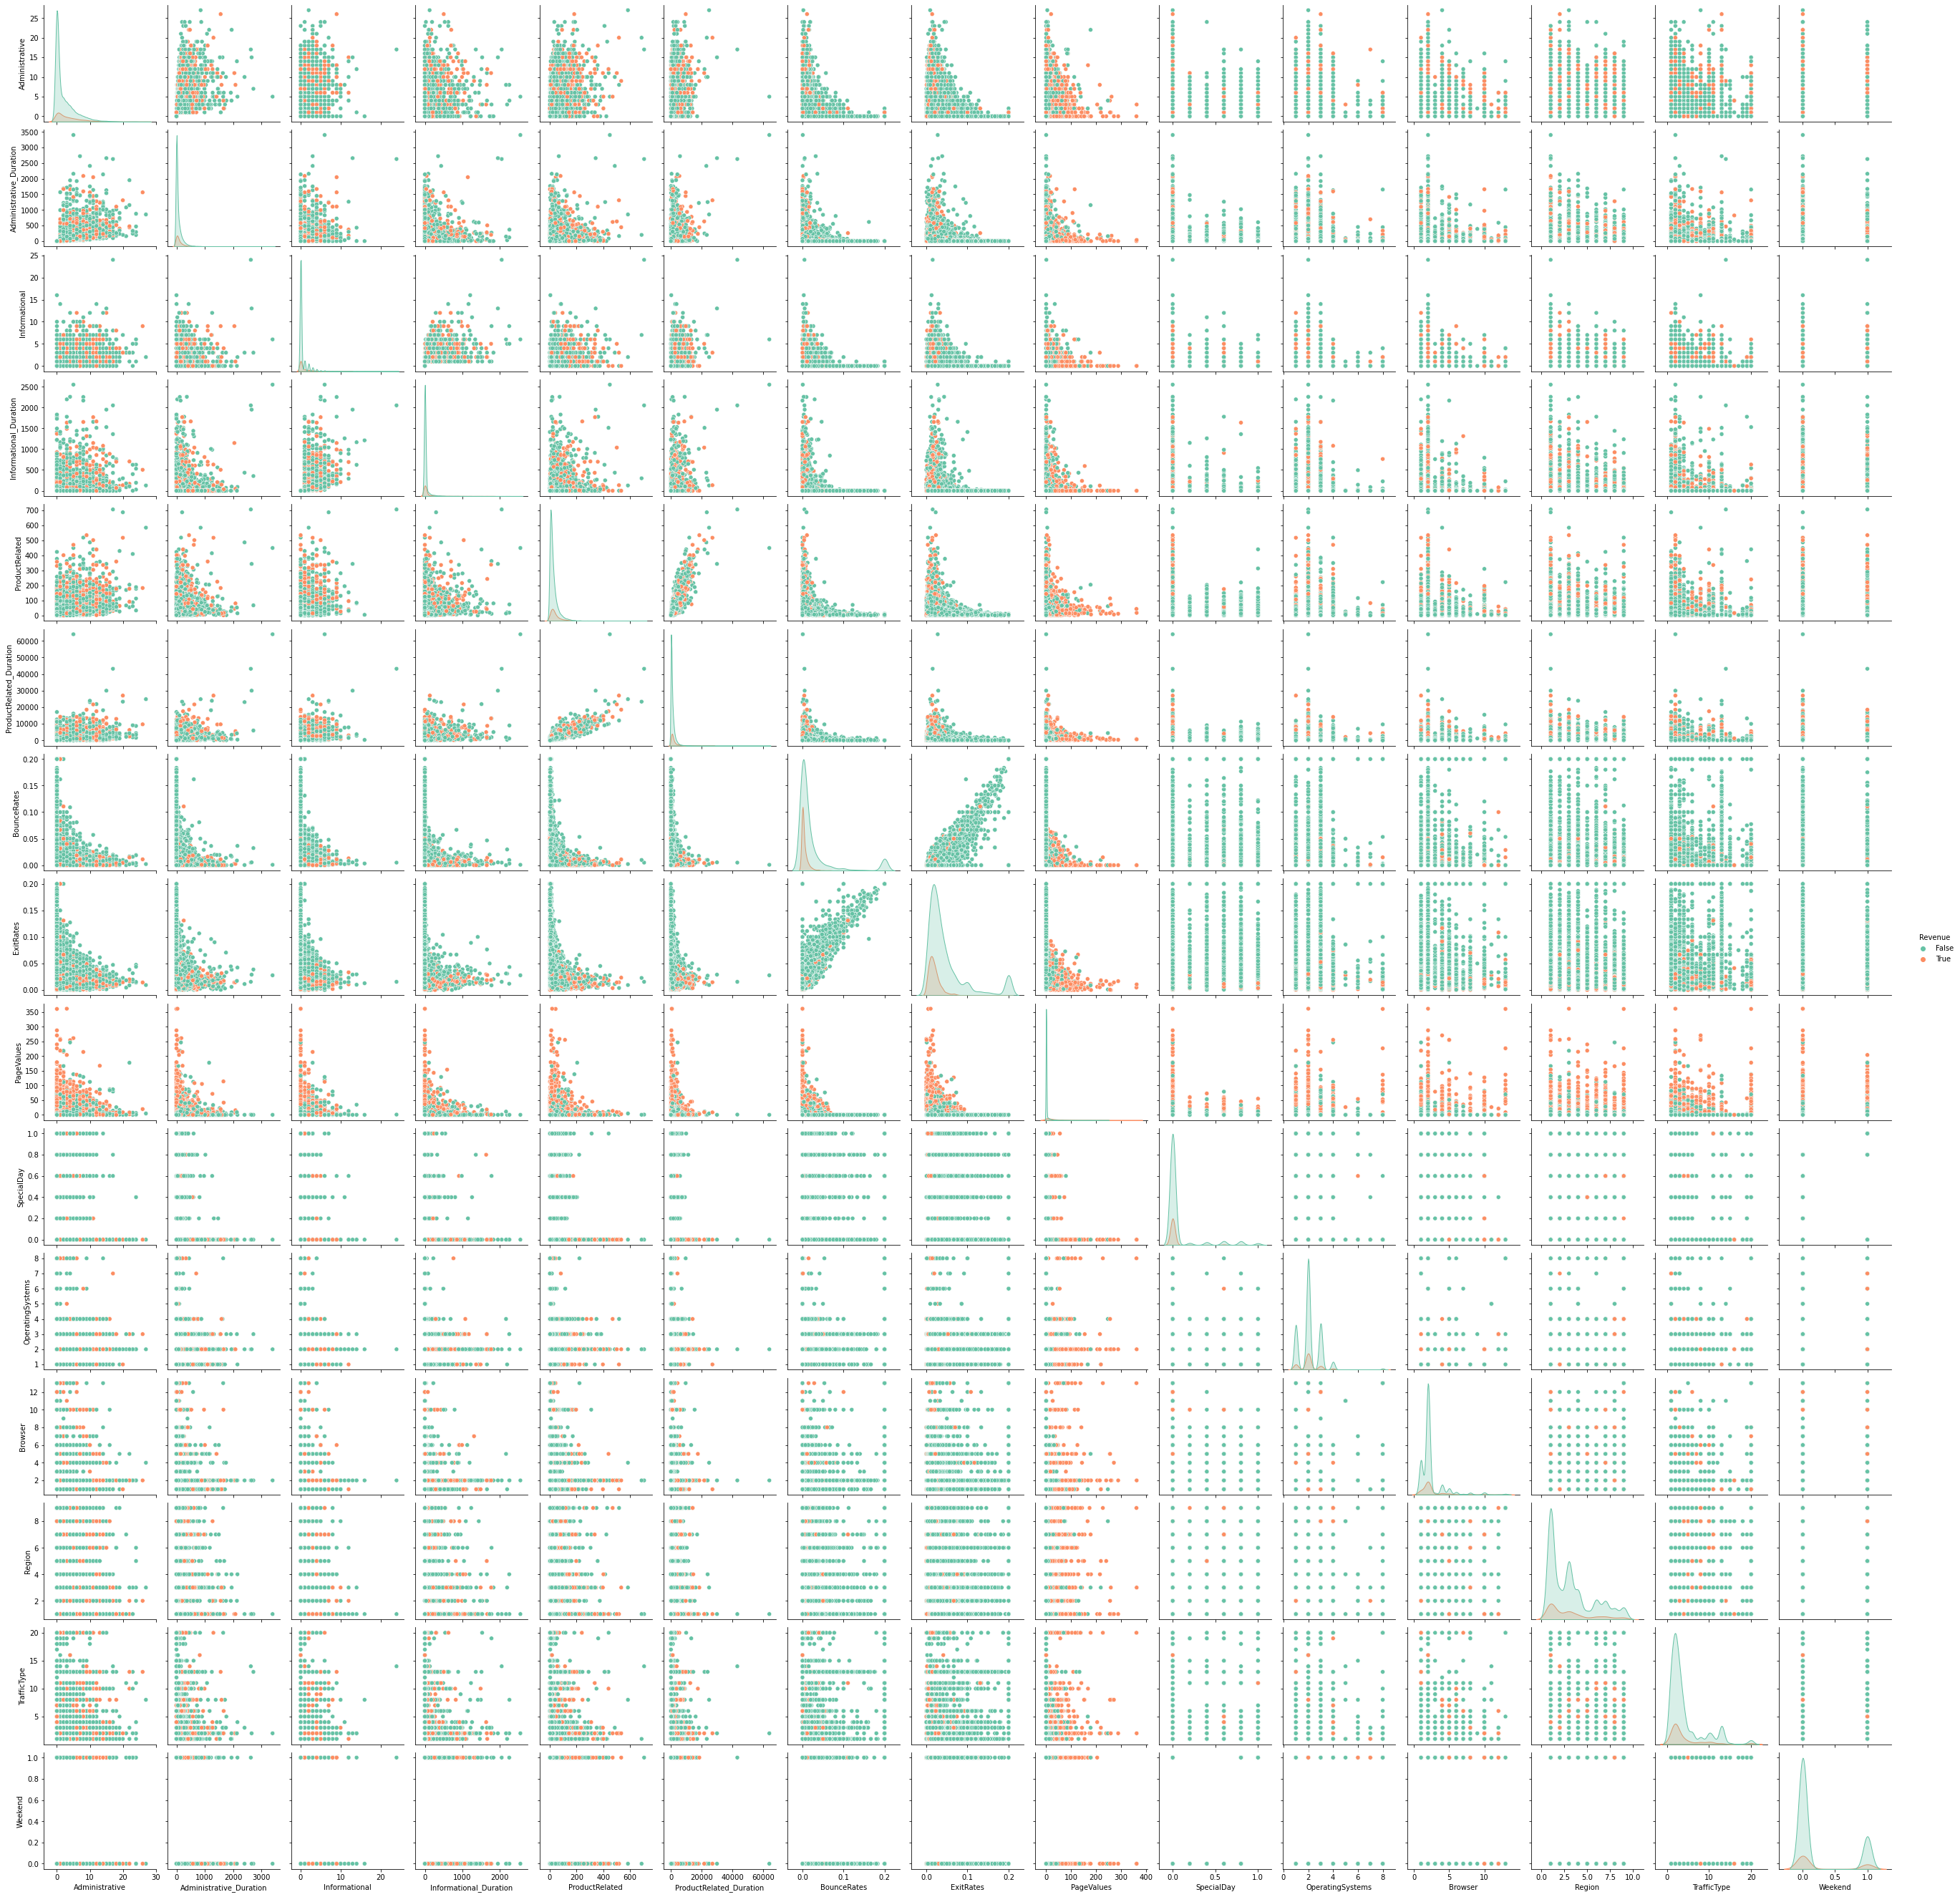

In [52]:
sns.pairplot(df,vars=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType','Weekend'],
             hue='Revenue',palette='Set2')

In [54]:
#

#### Perform required missing value treatment

In [110]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [111]:
# There is no null values present in the Data.

#### Perform Outlier treatment if required

In [112]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Administrative'),
  Text(2, 0, 'Administrative_Duration'),
  Text(3, 0, 'Informational'),
  Text(4, 0, 'Informational_Duration'),
  Text(5, 0, 'ProductRelated'),
  Text(6, 0, 'ProductRelated_Duration'),
  Text(7, 0, 'BounceRates'),
  Text(8, 0, 'ExitRates'),
  Text(9, 0, 'PageValues'),
  Text(10, 0, 'SpecialDay'),
  Text(11, 0, 'OperatingSystems'),
  Text(12, 0, 'Browser'),
  Text(13, 0, 'Region'),
  Text(14, 0, 'TrafficType'),
  Text(15, 0, 'Weekend'),
  Text(16, 0, 'Revenue')])

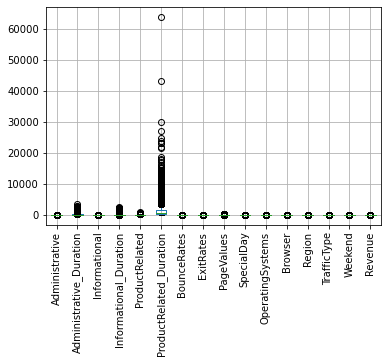

In [113]:
df.boxplot()
plt.xticks(rotation=90)

In [114]:
# As I'm not dropping any outlieres present in my Data so far.
# Most of the Data lies on 4th quartile range. AS If i drop outliers I can lot of my Data.
# For further proccess of Clustering I'm taking this outliers into consideration & check my model performance.

#### Perform appropriate scaling

In [115]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [116]:
x=df_num[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]
SS=StandardScaler()
x_std=SS.fit_transform(x)
x_std=pd.DataFrame(x_std,columns=x.columns)
x_std.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821


In [117]:
x_std=pd.concat([x_std,df_num[['OperatingSystems', 'Browser', 'Region', 'TrafficType']]],axis=1)
x_std.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,1,1,1,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,1,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,4,1,9,3
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,3,2,2,4
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,3,3,1,4


#### Perform required encoding techniques

In [118]:
df_cat=df.select_dtypes(include=np.object)
df_cat.head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [119]:
df_cat['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [120]:
df_cat['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
LE=LabelEncoder()
df_cat['Month']=LE.fit_transform(df_cat['Month'])

In [123]:
df_cat['VisitorType']=LE.fit_transform(df_cat['VisitorType'])

In [124]:
df_cat.head()

,Month,VisitorType
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [125]:
x_std=pd.concat([x_std,df_cat],axis=1)
x_std.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,1,1,1,1,2,2
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,1,2,2,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,4,1,9,3,2,2
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,3,2,2,4,2,2
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,3,3,1,4,2,2


In [130]:
x_std.shape

(12330, 16)

In [134]:
df['Weekend'].replace(to_replace=['True','False'],value=[1,0],inplace=True)

In [136]:
df['Weekend']=df['Weekend'].astype('int64')

In [142]:
df['Weekend']

0        0
1        0
2        0
3        0
4        1
        ..
12325    1
12326    1
12327    1
12328    0
12329    1
Name: Weekend, Length: 12330, dtype: int64

In [143]:
x_std=pd.concat([x_std,df['Weekend']],axis=1)

In [145]:
x_std.shape

(12330, 17)

In [180]:
df['Revenue']=df['Revenue'].astype('int64')

In [181]:
df['Revenue'].replace(to_replace=['True','False'],value=[1,0],inplace=True)

In [182]:
df['Revenue']

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [183]:
df['Revenue'].value_counts()/len(df)*100

0    84.525547
1    15.474453
Name: Revenue, dtype: float64

In [127]:
# AS per the statistical way the data is balanced because data is around 15% and above.

#### Build the different cluster models.

In [148]:
kmeans=KMeans(n_clusters=8,random_state=10)
kmeans.fit(x_std)

KMeans(random_state=10)

In [149]:
kmeans.inertia_

219634.82143217084

In [150]:
kmeans.labels_

array([6, 4, 3, ..., 1, 1, 2])

In [151]:
kmeans.cluster_centers_

array([[-8.43860788e-02, -8.29178810e-02, -1.48173670e-01,
        -1.14516000e-01, -8.01612065e-02, -6.55515347e-02,
        -1.52670292e-01, -9.09812075e-02,  2.86337403e-02,
         1.26197807e-01,  1.98890650e+00,  7.07448494e+00,
         2.64976228e+00,  2.51188590e+00,  5.55625990e+00,
         1.76545166e+00,  2.09191759e-01],
       [-8.76360519e-02, -4.40764288e-02, -9.11050343e-02,
        -9.36483575e-02, -8.05570818e-02, -6.58645758e-02,
         1.73408910e-01,  1.75333955e-01, -4.32177962e-02,
         2.28563024e-02,  2.26094092e+00,  2.19803063e+00,
         2.99562363e+00,  1.11132385e+01,  5.36105033e+00,
         1.73413567e+00,  2.57111597e-01],
       [-1.03687151e-01, -1.20146170e-01, -1.63483598e-01,
        -1.59848009e-01, -1.33369265e-01, -1.35782645e-01,
        -2.67627767e-01, -2.29193699e-01,  6.48567777e-03,
         7.49876875e-02,  2.07409012e+00,  1.91681109e+00,
         1.99003466e+00,  2.52209705e+00,  6.31044194e+00,
         1.70385615e+00,  2.4

In [154]:
silhouette_score(x_std,kmeans.labels_)

0.2434161399864289

In [152]:
ac=AgglomerativeClustering(n_clusters=8,linkage='ward')
ac.fit(x_std)

AgglomerativeClustering(n_clusters=8)

In [153]:
ac.labels_

array([5, 2, 5, ..., 0, 0, 4], dtype=int64)

In [155]:
silhouette_score(x_std,ac.labels_)

0.19150281384094126

#### Analyse the optimum number of cluster using appropriate techniques.

In [156]:
inertia=[]

for i in range(1,14):
    m1=KMeans(n_clusters=i,random_state=10)
    m1.fit(x_std)
    inertia.append(m1.inertia_)

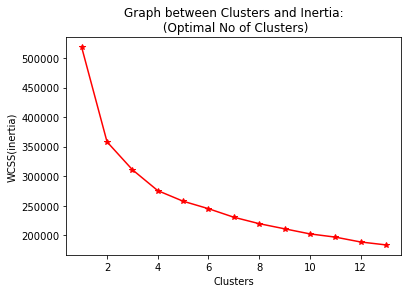

In [160]:
plt.plot(range(1,14),inertia,color='red',marker='*')
plt.title('Graph between Clusters and Inertia:\n (Optimal No of Clusters)')
plt.xlabel('Clusters')
plt.ylabel('WCSS(inertia)')
plt.show()

In [173]:
# The Optimal number of Clusters that are formed for this dataset is 2.

In [166]:
Z=linkage(x_std,'average')
c,coph_dist=cophenet(Z,pdist(x_std))
c

0.8298902089146879

In [172]:
# AS 'Average' method is giving me best cophent coefficient compare to other methods like 'ward','complete','single'.
# So I proceed with my average method for linkage matrix.

In [167]:
coph_dist

array([ 7.84857648,  6.85880983,  7.84857648, ...,  4.51751349,
       11.74262928, 11.74262928])

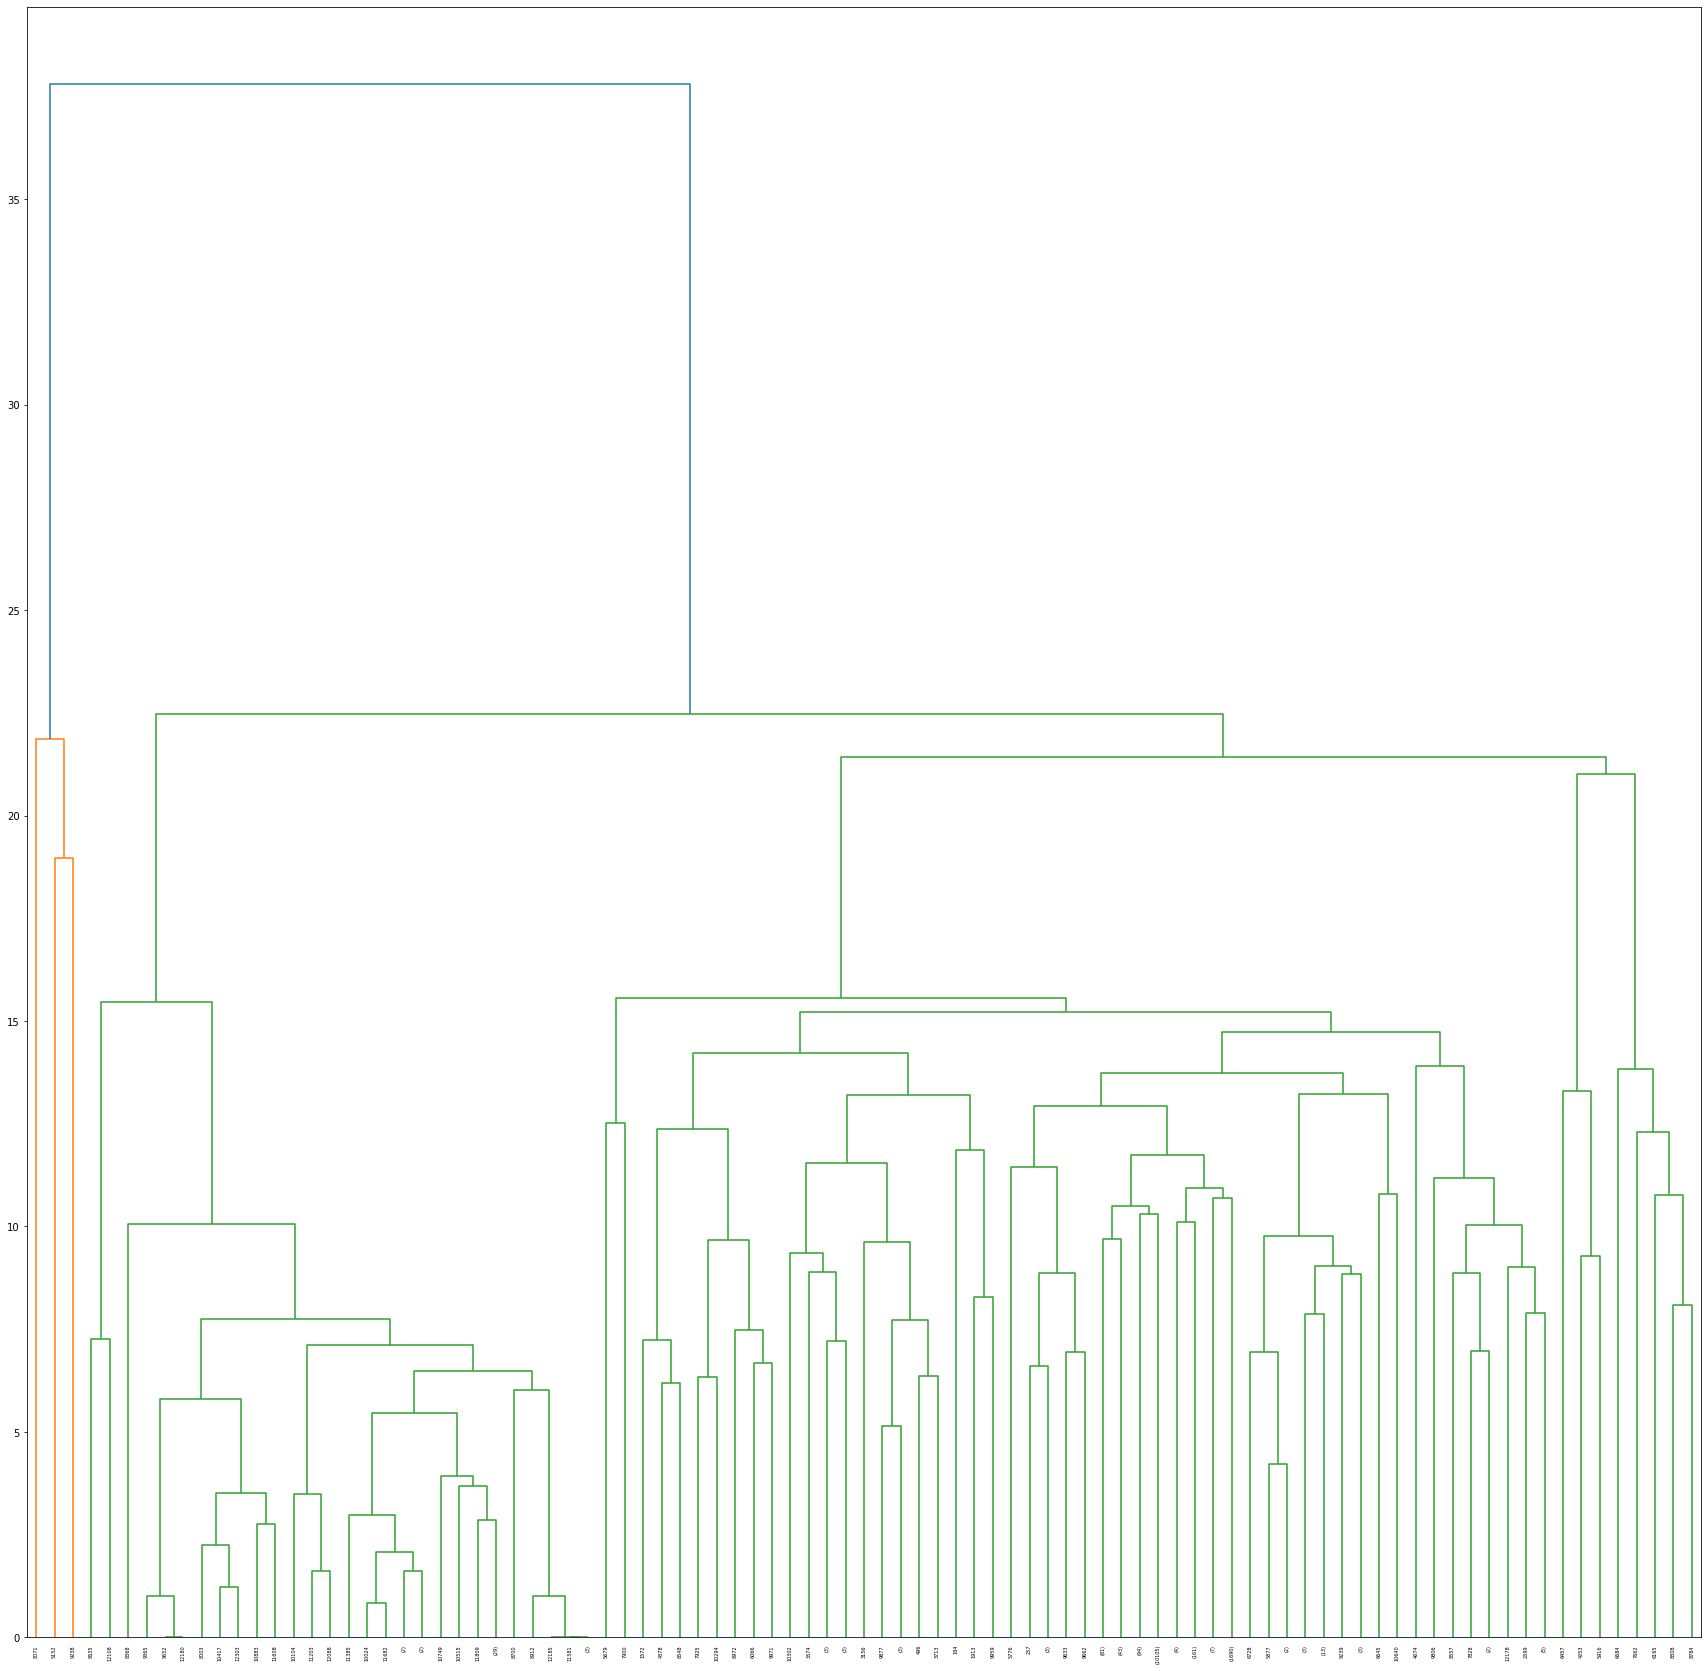

In [197]:
plt.figure(figsize=(30,30))
dendrogram(Z,truncate_mode='level',p=10)
plt.show()

In [ ]:
# As we can see clearly that Two clusters are formed.

In [174]:
m1=KMeans(n_clusters=2,random_state=10)
m1.fit(x_std)

KMeans(n_clusters=2, random_state=10)

In [175]:
m1.inertia_

358049.754819731

In [176]:
m1.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [177]:
m1.cluster_centers_

array([[ 1.29841465e-02,  3.91237958e-03,  1.20842561e-02,
         8.19229666e-03,  1.15290539e-02,  7.06835870e-03,
        -3.28720597e-02, -3.23033377e-02, -1.18227289e-03,
         2.25589691e-04,  2.06755304e+00,  2.31655098e+00,
         3.12005084e+00,  2.43943690e+00,  5.13960309e+00,
         1.72206472e+00,  2.29543455e-01],
       [-6.32150568e-02, -1.90479442e-02, -5.88338200e-02,
        -3.98852939e-02, -5.61307436e-02, -3.44132514e-02,
         1.60042027e-01,  1.57273128e-01,  5.75605396e-03,
        -1.09831364e-03,  2.39885769e+00,  2.55449786e+00,
         3.28034269e+00,  1.20061875e+01,  5.28272251e+00,
         1.70014279e+00,  2.47501190e-01]])

In [178]:
silhouette_score(x_std,m1.labels_)

0.40904190977833116

In [185]:
labels=pd.DataFrame({'labels':m1.labels_})
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,1
12327,1
12328,1


In [187]:
print('Original Labels')
print(df.Revenue.value_counts())
print()
print('Predicted Labels')
print(labels.value_counts())

Original Labels
0    10422
1     1908
Name: Revenue, dtype: int64

Predicted Labels
labels
0         10229
1          2101
dtype: int64


In [188]:
agc=AgglomerativeClustering(n_clusters=2,linkage='average')
agc.fit(x_std)

AgglomerativeClustering(linkage='average')

In [189]:
agc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
labels_agc=pd.DataFrame({'labels':agc.labels_})
labels_agc

,labels
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


In [195]:
print('Original Labels')
print(df.Revenue.value_counts())
print()
print('Predicted Labels')
print(labels_agc.value_counts())

Original Labels
0    10422
1     1908
Name: Revenue, dtype: int64

Predicted Labels
labels
0         12327
1             3
dtype: int64


#### Make the appropriate business interpretation using the cluster centroids.

In [199]:
m1.cluster_centers_

array([[ 1.29841465e-02,  3.91237958e-03,  1.20842561e-02,
         8.19229666e-03,  1.15290539e-02,  7.06835870e-03,
        -3.28720597e-02, -3.23033377e-02, -1.18227289e-03,
         2.25589691e-04,  2.06755304e+00,  2.31655098e+00,
         3.12005084e+00,  2.43943690e+00,  5.13960309e+00,
         1.72206472e+00,  2.29543455e-01],
       [-6.32150568e-02, -1.90479442e-02, -5.88338200e-02,
        -3.98852939e-02, -5.61307436e-02, -3.44132514e-02,
         1.60042027e-01,  1.57273128e-01,  5.75605396e-03,
        -1.09831364e-03,  2.39885769e+00,  2.55449786e+00,
         3.28034269e+00,  1.20061875e+01,  5.28272251e+00,
         1.70014279e+00,  2.47501190e-01]])

In [201]:
df_centroid=pd.DataFrame(m1.cluster_centers_,columns=x_std.columns)
df_centroid.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend
0,0.012984,0.003912,0.012084,0.008192,0.011529,0.007068,-0.032872,-0.032303,-0.001182,0.000226,2.067553,2.316551,3.120051,2.439437,5.139603,1.722065,0.229543
1,-0.063215,-0.019048,-0.058834,-0.039885,-0.056131,-0.034413,0.160042,0.157273,0.005756,-0.001098,2.398858,2.554498,3.280343,12.006188,5.282723,1.700143,0.247501


In [203]:
# compare to 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
# 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay' these variables 
#  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month','VisitorType', 'Weekend' features are affecting the Target
# feature Revenue.
## we can say that whenever the 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
# 'ProductRelated','ProductRelated_Duration',special day is near moderate & 'BounceRates', 'ExitRates', 'PageValues' ,
# are very low,The features 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month','VisitorType', 'Weekend' are 
# close to high then the Revenue is generating.

In [206]:
# when
# 'Administrative' and 'Administrative_Duration' time of visitor is less,
#  'Informational' and 'Informational_Duration' time of visitor is less,
#  'ProductRelated' and 'ProductRelated_Duration' time of visitor is less,
# even
# 'Bounce Rates' of a user just come and leave without any request is less,
#  'ExitRates' percentage that were last in the session is less,
#  'PageValues' average value of web page user visited before completeing e-commerce transaction is less,
#  'SpecialDay' is determined by considering the dynamics of e-commerce such as the duration between the 
#   order date and delivery date ,we can say it as closeness of site visiting on special day is less,
#  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month','VisitorType', 'Weekend' is little high 
#   compare to above features.
#
#  So, We can conclude that a visitor in whole annual period of time 
#  'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
# 'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
#  are not impacting my Revenue.(Revenue is low)
#  while
#  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month','VisitorType', 'Weekend' are 
#   impacting my Revenue.(Revenue is high)
#
# whenver The Visitor is using good Operarting system and also fast and high quality browser,lives in good region,
# Traffic type is high,if he was a Returning visitor and constantly visitings high no of weekends gets high Revenue.

#### Perform the EDA on cluster groups to understand the cluster characteristics.

In [211]:
df1=df
df1=df1.drop(['Revenue'],axis=1)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1


In [212]:
df_0=pd.concat([df1,labels],axis=1)
df_0.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,labels
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [215]:
df_a=df_0[df_0['labels']==0]
df_a.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,labels
count,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.0
mean,2.358295,81.510209,0.518917,35.625411,32.244208,1208.272172,0.020598,0.041503,5.867306,0.061472,2.067553,2.316551,3.120051,2.439437,0.229543,0.0
std,3.307442,176.228970,1.271418,140.795341,44.214232,1887.948821,0.046804,0.047295,17.787859,0.199331,0.824934,1.585801,2.366303,1.298586,0.420560,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.750000,0.000000,0.013933,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.0
50%,1.000000,10.000000,0.000000,0.000000,18.000000,615.816667,0.002667,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.0
75%,4.000000,94.866667,0.000000,0.000000,38.000000,1489.144444,0.015385,0.046984,0.000000,0.000000,2.000000,2.000000,4.000000,3.000000,0.000000,0.0
max,24.000000,3398.750000,14.000000,2549.375000,686.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,7.000000,1.000000,0.0


In [217]:
df_b=df_0[df_0['labels']==1]
df_b.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,labels
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.0
mean,2.105188,77.451469,0.428843,28.858799,29.235126,1128.893308,0.029951,0.050715,5.996134,0.061209,2.398858,2.554498,3.280343,12.006188,0.247501,1.0
std,3.383697,179.437796,1.261634,140.423119,45.654749,2033.439549,0.055328,0.053855,21.980812,0.196939,1.212584,2.240218,2.562911,3.308209,0.431663,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,6.000000,139.000000,0.000000,0.015877,0.000000,0.000000,2.000000,2.000000,1.000000,10.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,15.000000,526.500000,0.005714,0.029630,0.000000,0.000000,2.000000,2.000000,3.000000,11.000000,0.000000,1.0
75%,3.000000,83.000000,0.000000,0.000000,33.000000,1345.136667,0.027459,0.061538,0.000000,0.000000,3.000000,2.000000,4.000000,13.000000,0.000000,1.0
max,27.000000,2720.500000,24.000000,2256.916667,705.000000,43171.233380,0.200000,0.200000,360.953384,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.0


#### Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  

In [244]:
pca=PCA(n_components=8,random_state=10)
xtrans=pca.fit_transform(x_std)
xtrans

array([[-3.21055887,  0.24656369, -3.99935009, ...,  3.53136333,
        -0.90638239, -0.91355543],
       [-2.2489912 ,  0.31062756, -3.826564  , ..., -0.03931941,
        -0.02277066,  0.14903621],
       [-0.71594009,  6.61398822,  0.68410341, ...,  3.74991612,
        -0.72296923, -0.93788043],
       ...,
       [ 8.93852113, -2.90732872, -0.46631365, ...,  0.63981518,
        -0.33957128, -0.10462306],
       [ 6.90728827, -1.41372979,  0.99231792, ..., -0.94429914,
        -0.26553092, -0.16205397],
       [-2.04622659, -2.57869915,  0.18522932, ..., -0.72269388,
        -0.41566278,  0.32643577]])

In [239]:
pca.components_

array([[-1.08807275e-02, -5.62831870e-03, -1.11700165e-02,
        -8.27415501e-03, -1.34501527e-02, -1.17320319e-02,
         2.22580684e-02,  2.25627423e-02,  3.09804081e-03,
         1.44472462e-02,  4.62651158e-02,  5.96869039e-02,
         4.58397487e-02,  9.94552724e-01,  3.42864865e-02,
        -4.83300455e-04, -3.82347861e-04],
       [-3.21842356e-02, -2.49168203e-02, -3.32479633e-02,
        -2.61230243e-02, -5.18832503e-02, -4.80963620e-02,
         1.15332269e-02,  1.70827395e-02, -2.62116010e-03,
        -2.68307985e-02,  3.86906263e-02,  1.39730272e-01,
         7.88632873e-01, -2.88551627e-02, -5.88518316e-01,
        -1.52394764e-02, -4.09471579e-03],
       [ 3.53073244e-02,  2.46406483e-02,  1.38975307e-02,
         6.34410629e-03,  3.62835308e-02,  3.37632940e-02,
        -2.98310252e-02, -3.78853376e-02,  1.67025334e-02,
         2.23224278e-02,  3.93152795e-03,  1.94143851e-02,
         5.97336392e-01, -5.35161143e-02,  7.95150273e-01,
        -6.63150153e-04,  4.7

In [240]:
pca.explained_variance_

array([16.34134879,  5.98706843,  5.48195921,  3.34999036,  2.88966391,
        1.69490459,  1.08121661,  1.0106952 ])

In [241]:
np.sum(pca.explained_variance_ratio_)*100

90.03735950528582

In [243]:
pca.n_components_

8

In [242]:
# The 8 principal components are  explaining 90% variation.

In [251]:
pc_trans=pd.DataFrame(xtrans,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
pc_trans.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,-3.210559,0.246564,-3.999350,-3.059242,-1.404684,3.531363,-0.906382,-0.913555
1,-2.248991,0.310628,-3.826564,-1.177500,-0.167861,-0.039319,-0.022771,0.149036
2,-0.715940,6.613988,0.684103,-2.760395,-2.186100,3.749916,-0.722969,-0.937880
3,-0.125880,1.107737,-3.395358,-1.625823,-0.344868,1.047789,-0.240139,-0.170257
4,-0.174224,0.390928,-3.862370,-0.651347,0.821783,-0.267302,0.215554,0.113088


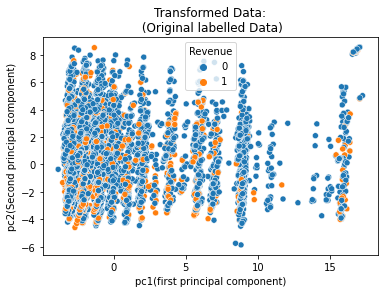

In [253]:
sns.scatterplot(x='pc1',y='pc2',hue=df['Revenue'],data=pc_trans)
plt.title('Transformed Data:\n (Original labelled Data)')
plt.xlabel('pc1(first principal component)')
plt.ylabel('pc2(Second principal component)')
plt.show()

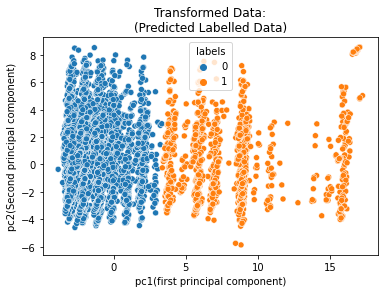

In [254]:
sns.scatterplot(x='pc1',y='pc2',hue=df_0['labels'],data=pc_trans)
plt.title('Transformed Data:\n(Predicted Labelled Data)')
plt.xlabel('pc1(first principal component)')
plt.ylabel('pc2(Second principal component)')
plt.show()

In [255]:
# Yes PCA is helping good inorder to cluster the lables.

#### Also try different graphs to visualize the clusters and its characteristics. 

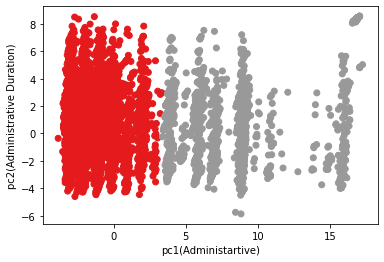

In [263]:
plt.scatter(pc_trans.iloc[:,0],pc_trans.iloc[:,1],c=m1.labels_,cmap=plt.cm.Set1)
plt.xlabel('pc1(Administartive)')
plt.ylabel('pc2(Administrative Duration)')
plt.show()

In [262]:
x_std.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month',
       'VisitorType', 'Weekend'],
      dtype='object')

In [264]:
# comparing the cluster labels with the Original Labels.

<AxesSubplot:title={'center':'Administrative'}, xlabel='Revenue'>

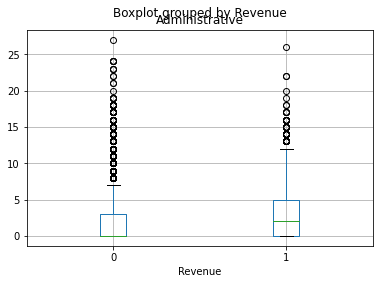

In [265]:
df.boxplot(column='Administrative',by='Revenue')

<AxesSubplot:title={'center':'Administrative'}, xlabel='labels'>

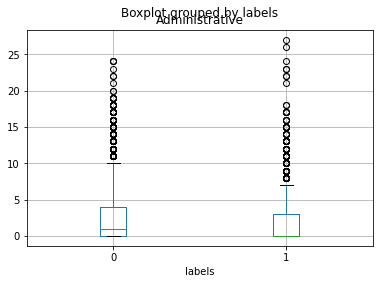

In [266]:
df_0.boxplot(column='Administrative',by='labels')

In [267]:
df_a=df_0[df_0['labels']==0]
df_a.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,labels
count,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.000000,10229.0
mean,2.358295,81.510209,0.518917,35.625411,32.244208,1208.272172,0.020598,0.041503,5.867306,0.061472,2.067553,2.316551,3.120051,2.439437,0.229543,0.0
std,3.307442,176.228970,1.271418,140.795341,44.214232,1887.948821,0.046804,0.047295,17.787859,0.199331,0.824934,1.585801,2.366303,1.298586,0.420560,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.750000,0.000000,0.013933,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.0
50%,1.000000,10.000000,0.000000,0.000000,18.000000,615.816667,0.002667,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.0
75%,4.000000,94.866667,0.000000,0.000000,38.000000,1489.144444,0.015385,0.046984,0.000000,0.000000,2.000000,2.000000,4.000000,3.000000,0.000000,0.0
max,24.000000,3398.750000,14.000000,2549.375000,686.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,7.000000,1.000000,0.0


In [268]:
df_b=df_0[df_0['labels']==1]
df_b.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,labels
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.0
mean,2.105188,77.451469,0.428843,28.858799,29.235126,1128.893308,0.029951,0.050715,5.996134,0.061209,2.398858,2.554498,3.280343,12.006188,0.247501,1.0
std,3.383697,179.437796,1.261634,140.423119,45.654749,2033.439549,0.055328,0.053855,21.980812,0.196939,1.212584,2.240218,2.562911,3.308209,0.431663,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,6.000000,139.000000,0.000000,0.015877,0.000000,0.000000,2.000000,2.000000,1.000000,10.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,15.000000,526.500000,0.005714,0.029630,0.000000,0.000000,2.000000,2.000000,3.000000,11.000000,0.000000,1.0
75%,3.000000,83.000000,0.000000,0.000000,33.000000,1345.136667,0.027459,0.061538,0.000000,0.000000,3.000000,2.000000,4.000000,13.000000,0.000000,1.0
max,27.000000,2720.500000,24.000000,2256.916667,705.000000,43171.233380,0.200000,0.200000,360.953384,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.0
